In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def read_set(fname,cols):
    assert isinstance(fname,str)
    '''
    input:name of the csv file
    input type: string
    output: an object of pandas.DataFrame
    output type: pandas.DataFrame
    
    function:read the csv file and return data set
    '''
    return pd.read_csv(fname, delimiter='\t', encoding='utf-8',usecols=cols,)


In [4]:
def select_data_and_combine(basics_fname,ratings_fname,show_type):
    '''
    input:
    basic_fname:name of the file which contains title's basic information. type:string
    ratings_fname:name of the file which contains title's rating information. type:string
    show_type:the show type we want to select. type:string
    
    output: an object of pandas.DataFrame which combines the two data sets
    output type: pandas.DataFrame
    
    function:select the data which we want corresponding to the type of the show.Then combine it with the rating data
    '''
    assert isinstance(basics_fname,str)
    assert isinstance(ratings_fname,str)
    assert isinstance(show_type,str)

        
    title_basics=read_set(basics_fname,['tconst', 'titleType', 'startYear','genres'])# read file
    title_ratings=read_set(ratings_fname,['tconst','averageRating'])# read file
    
    title_basics_selected = title_basics[title_basics['titleType'] == show_type] #select data we want
    
    title_basics_selected = title_basics_selected[title_basics_selected['startYear'] != '\\N']


    title_basics_and_ratings=pd.merge(title_basics_selected,title_ratings,how='inner')#combine the two dataset
    title_basics_and_ratings=title_basics_and_ratings[title_basics_and_ratings.genres != '\\N']#remove the incomplete data 
    
    print 'number of movies  '+str(title_basics_and_ratings.shape[0])
    
    return title_basics_and_ratings






In [5]:
def split_rows(data,column_name):
    '''
    input:
    data:an object of pandas.DataFrame whose rows need to be divided. type: pandas.DataFrame
    name_of_the_column: name of the column which we divide the rows by. type:string
    
    output:an object of pandas.DataFrame whose rows has been divided
    output type:pandas.DataFrame
    '''
    assert isinstance(column_name,str)
    
    tem=data[column_name].str.split(',',expand=True).stack().reset_index() #split the column and reindex
    tem.columns=['level_0','level_1','new_'+column_name]#name the new column
    res=pd.merge(tem,data,how='inner',left_on='level_0',right_index=True)#combine the column we just got with the raw dataset
    
    res=res.drop('level_0',1)#remove useless column
    res=res.drop('level_1',1)#remove useless column
    res=res.drop(column_name,1)#remove useless column
    
    print 'number of datas after split  '+str(res.shape[0])

    return res




In [6]:
def rank(data,column_name,year_start,year_end):
    '''
    input:
    data:an object of pandas.DataFrame which we will operate on. type: pandas.DataFrame
    column_name:name of the column which we will rank data by. type:string
    year_start,year_end:year:the starting and ending years of the data which we will rank on. type:int
    
    output:an object of pandas.DataFrame which we have already sorted. type:pandas.DataFrame
    '''
    tem=data[data['startYear'].astype(int)>=year_start] #select data
    
    print 'number of datas in the interval  '+str(tem[tem['startYear'].astype(int)<=year_end].shape[0])
    
    grp=tem[tem['startYear'].astype(int)<year_end].groupby('new_'+column_name) #select data and group the data
    res=grp.mean().sort_values(['averageRating']) #remove columns we do not need then sort
    return res

In [7]:
def get_relationof_type_ratings(basics_fname,ratings_fname,show_type,year_start=0,year_end=10000):
    '''
    input:
    basic_fname:name of the file which contains title's basic information. type:string
    ratings_fname:name of the file which contains title's rating information. type:string
    show_type:the show type we want to select. type:string
    year_start,year_end:year:the starting and ending years of the data which we will rank on. type:int
    
    output:an object of pandas.DataFrame which shows the relation we want. type:pandas.DataFrame
    '''
    combined_data=select_data_and_combine(basics_fname,ratings_fname,show_type)
    
    splited_data=split_rows(combined_data,'genres')#special for genres,since one movie may have several genres
    
    return rank(splited_data,'genres',year_start,year_end)


from 1890 to 1900


/home/qiuhao20132100/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


number of movies  199920
number of datas after split  348542
number of datas in the interval  24
from 1900 to 1910
number of movies  199920
number of datas after split  348542
number of datas in the interval  81
from 1910 to 1920
number of movies  199920
number of datas after split  348542
number of datas in the interval  1745
from 1920 to 1930
number of movies  199920
number of datas after split  348542
number of datas in the interval  4680
from 1930 to 1940
number of movies  199920
number of datas after split  348542
number of datas in the interval  15010
from 1940 to 1950
number of movies  199920
number of datas after split  348542
number of datas in the interval  15643
from 1950 to 1960
number of movies  199920
number of datas after split  348542
number of datas in the interval  20260
from 1960 to 1970
number of movies  199920
number of datas after split  348542
number of datas in the interval  25855
from 1970 to 1980
number of movies  199920
number of datas after split  348542
num

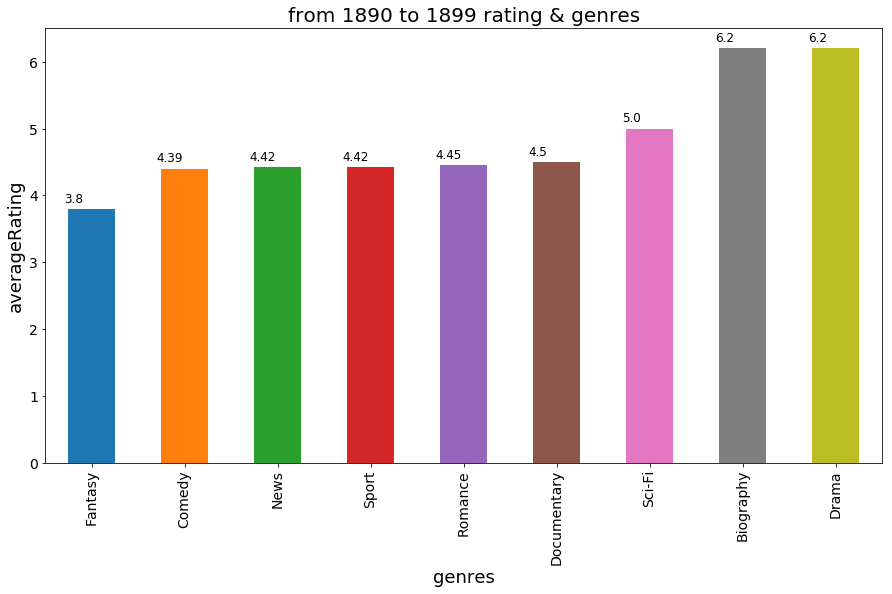

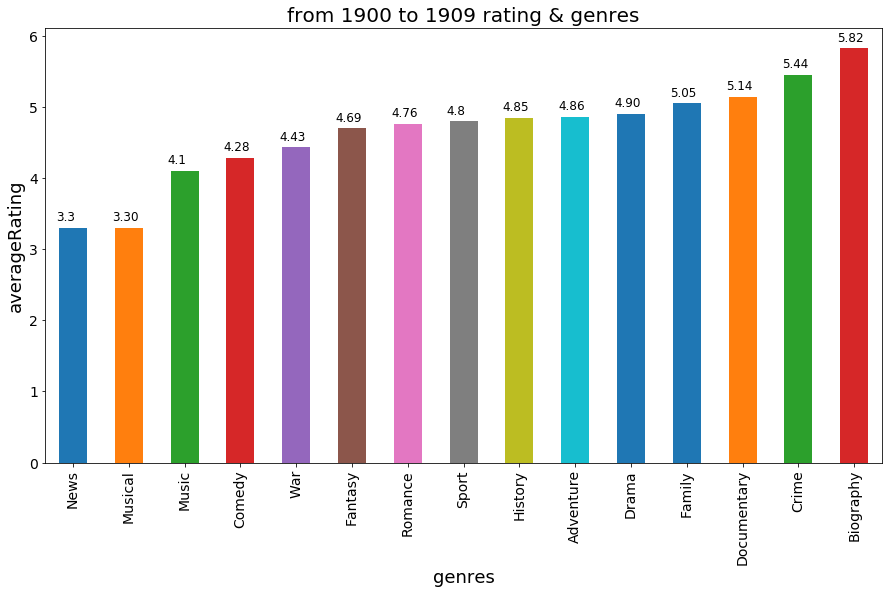

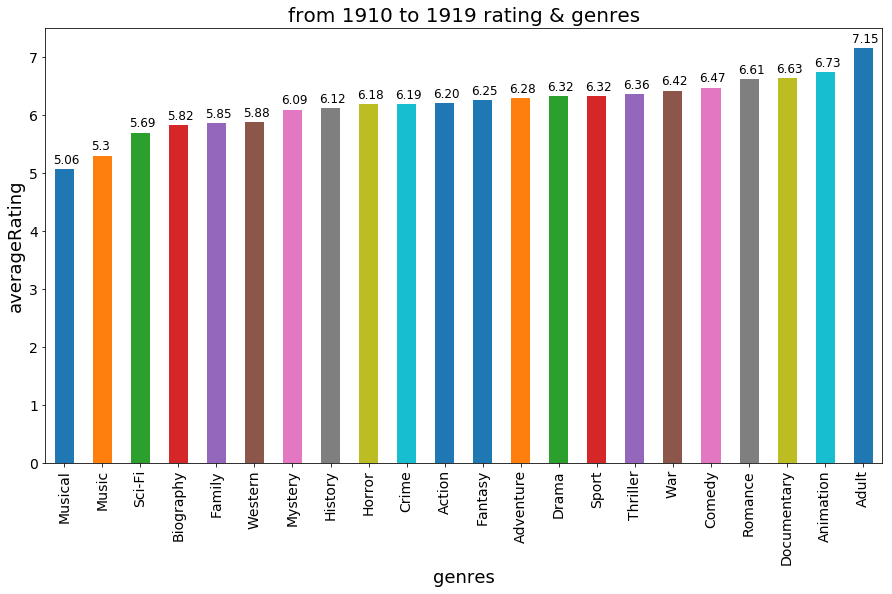

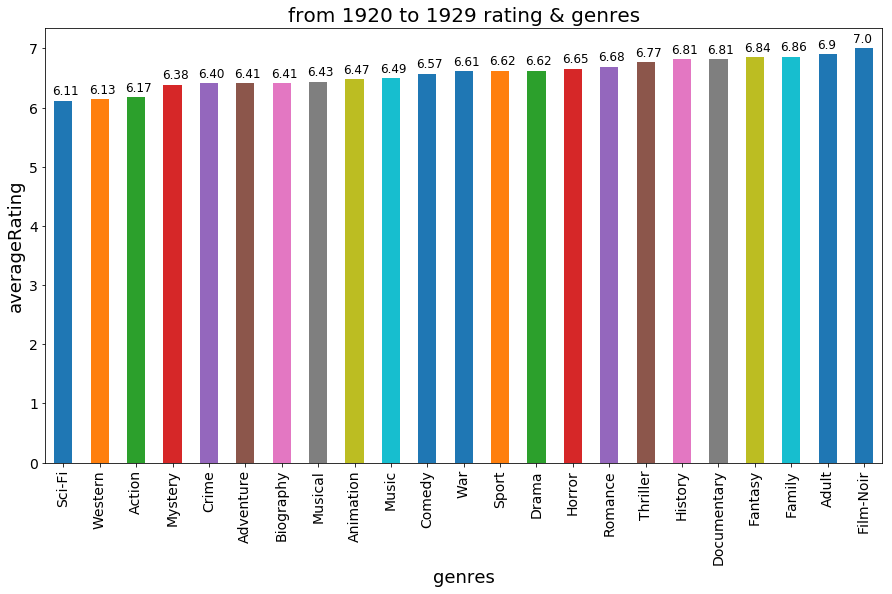

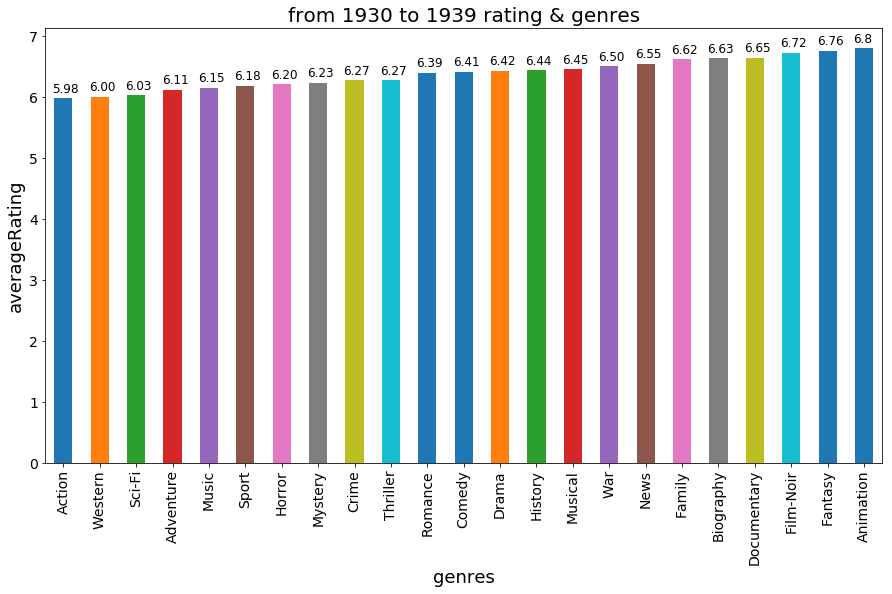

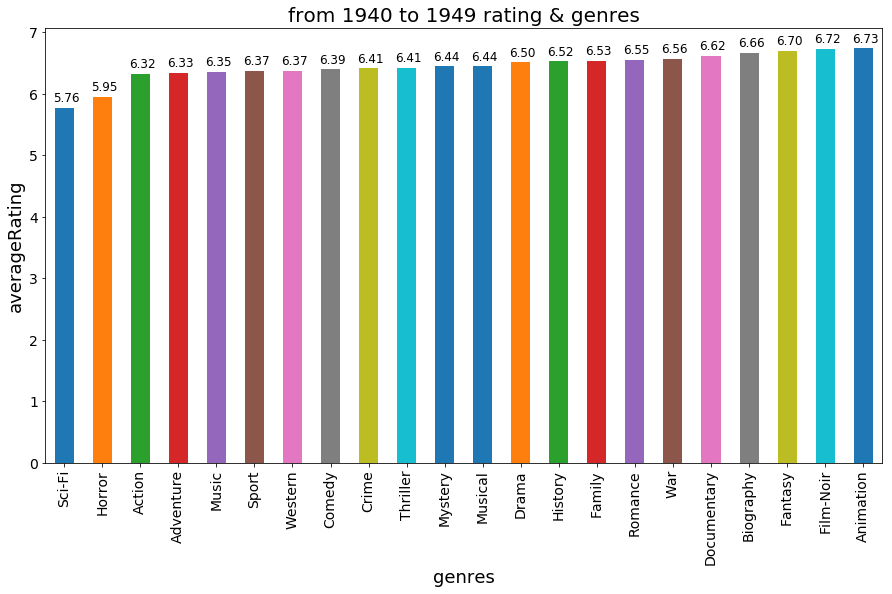

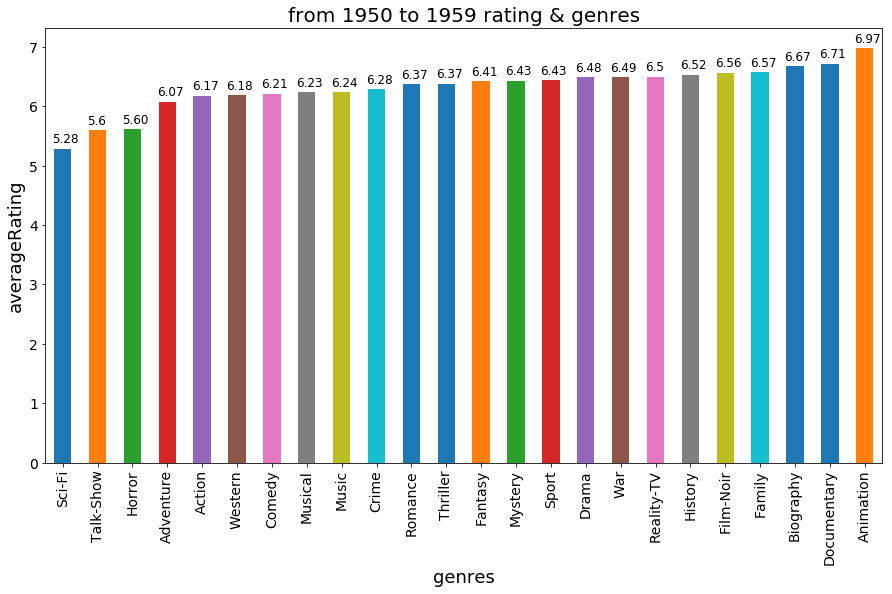

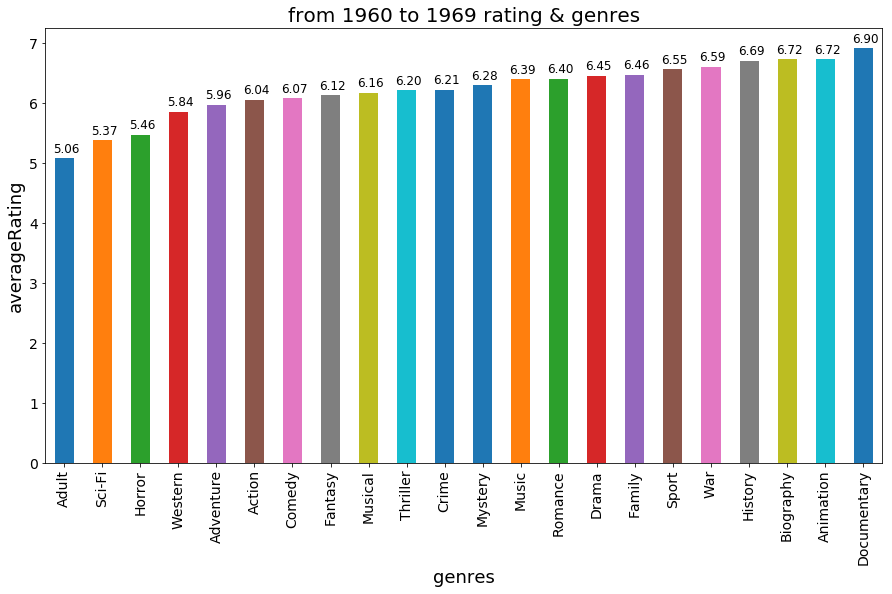

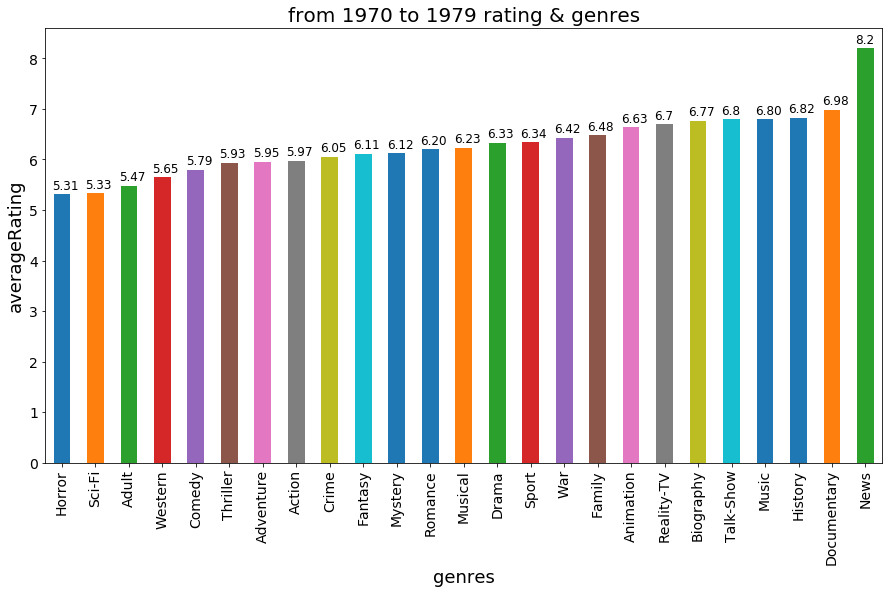

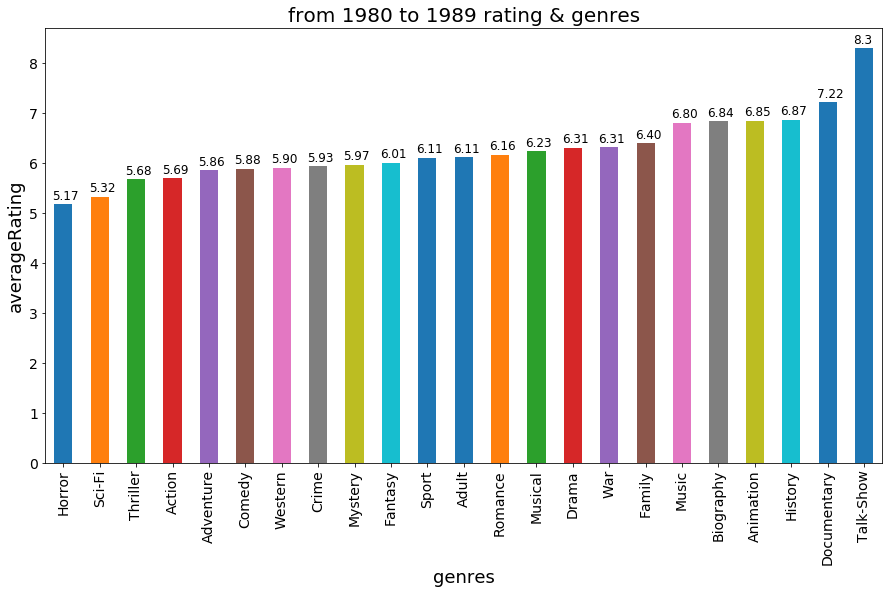

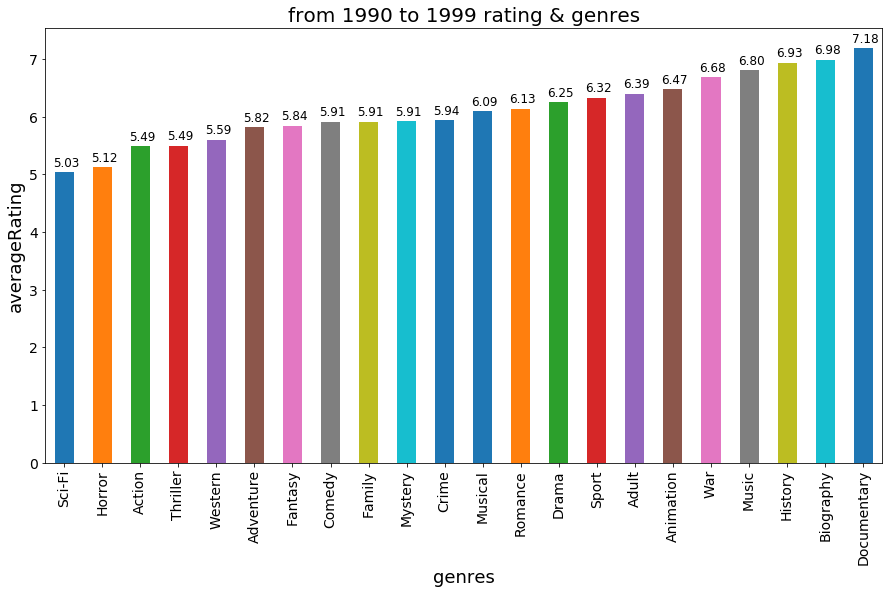

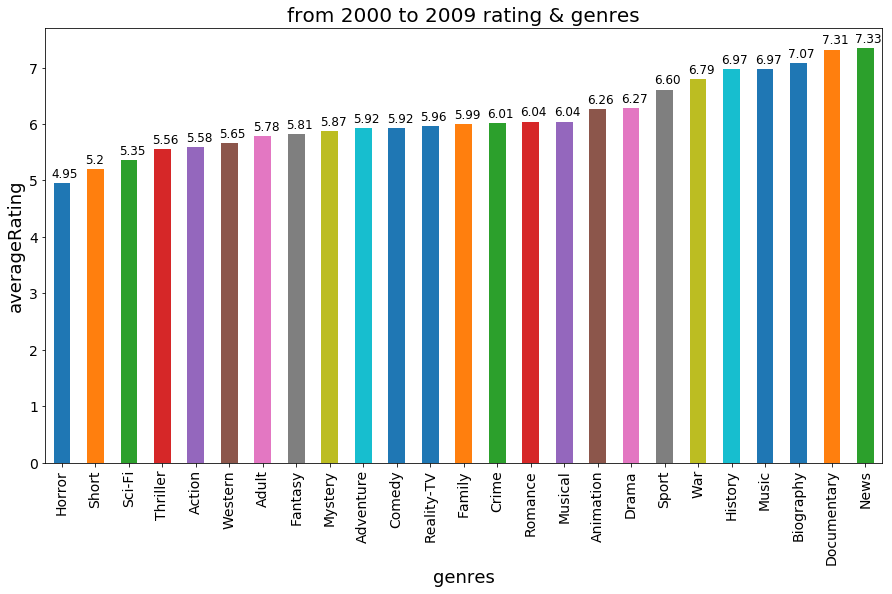

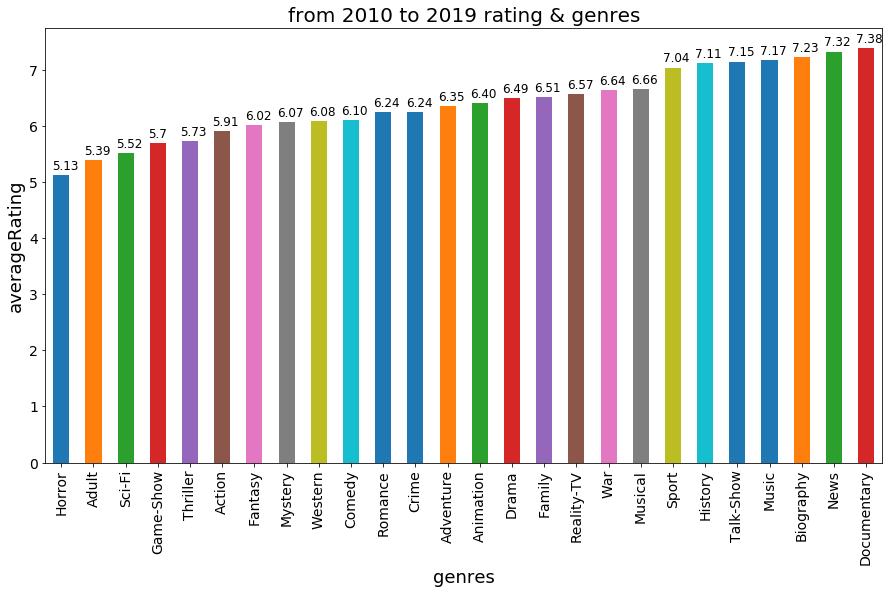

In [38]:
for i in range(13):
    print 'from '+str(1890+10*i)+' to '+str(1900+10*i)
    test=get_relationof_type_ratings('title.basics.tsv','title.ratings.tsv','movie',year_start=1890+10*i,year_end=1900+10*i)
    test.index.name='genres'
    
    #visualized#
    plt.figure(figsize=(15,8))
    label = []
    for j in range(len(test)):
        plt.text(x = j-.3,y=test['averageRating'].values[j]+0.1,s = str(test['averageRating'].values[j])[:4], size = 12)  
        
    ax=plt.gca()
    ax.set_ylabel('averageRating',fontsize=18 )
    ax.set_xlabel('genres',fontsize=18)  
    ax.set_title('from '+str(1890+10*i)+' to '+str(1900+10*i-1)+' rating & genres',fontsize=20)
    
    test['averageRating'].plot(kind = 'bar',fontsize=14 )
    plt.savefig('from '+str(1890+10*i)+' to '+str(1900+10*i-1)+' rating & genres')



/home/qiuhao20132100/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


number of movies  199920
number of datas after split  348542
number of datas in the interval  348542


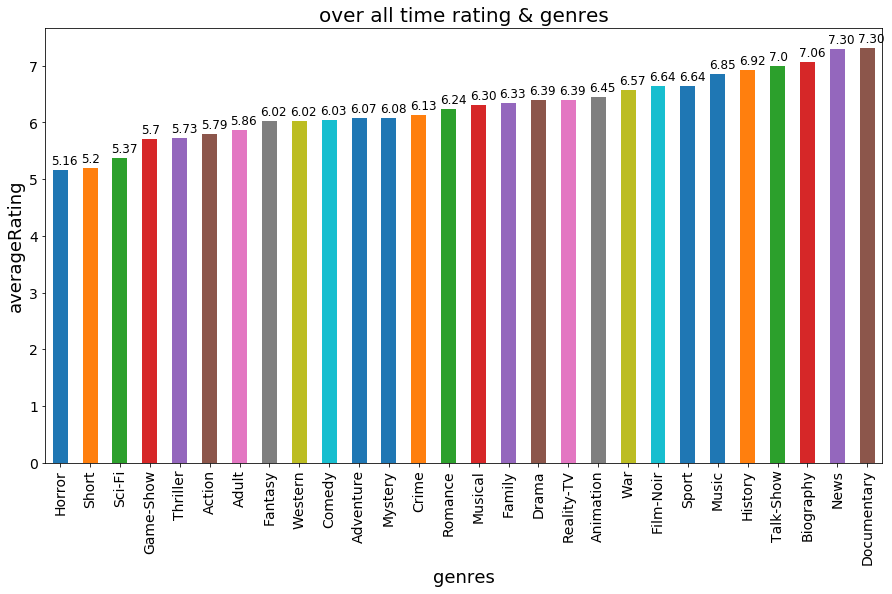

In [8]:
    test=get_relationof_type_ratings('title.basics.tsv','title.ratings.tsv','movie',year_start=1,year_end=10000)
    test.index.name='genres'
    
    #visualized#
    plt.figure(figsize=(15,8))
    label = []
    for j in range(len(test)):
        plt.text(x = j-.3,y=test['averageRating'].values[j]+0.1,s = str(test['averageRating'].values[j])[:4], size = 12)  
        
    ax=plt.gca()
    ax.set_ylabel('averageRating',fontsize=18 )
    ax.set_xlabel('genres',fontsize=18)  
    ax.set_title('over all time rating & genres',fontsize=20)
    
    test['averageRating'].plot(kind = 'bar',fontsize=14 )
    plt.savefig('over all time rating & genres rating & genres')



/home/qiuhao20132100/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


number of movies  199920
number of datas after split  348542
number of datas in the interval  174861


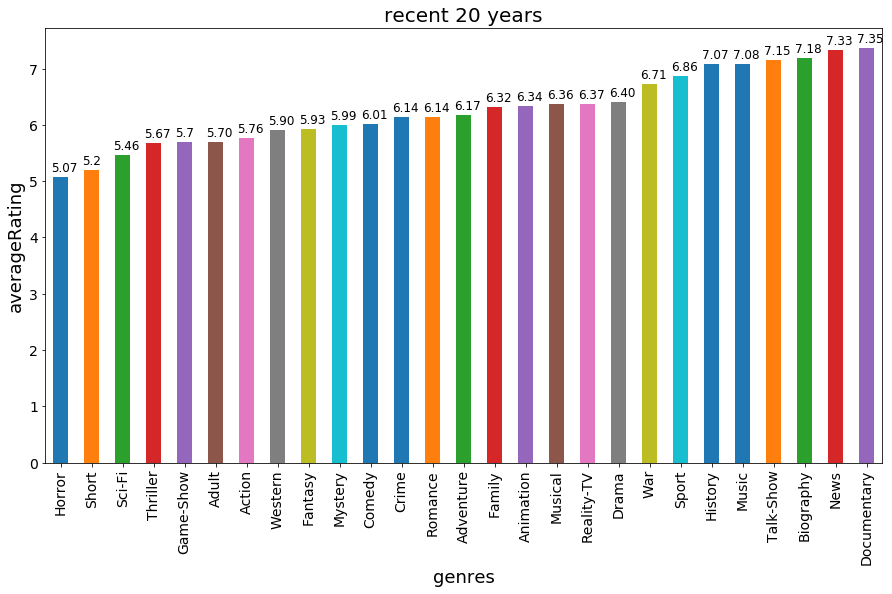

In [9]:
    test=get_relationof_type_ratings('title.basics.tsv','title.ratings.tsv','movie',year_start=2000,year_end=2020)
    test.index.name='genres'
    
    #visualized#
    plt.figure(figsize=(15,8))
    label = []
    for j in range(len(test)):
        plt.text(x = j-.3,y=test['averageRating'].values[j]+0.1,s = str(test['averageRating'].values[j])[:4], size = 12)  
        
    ax=plt.gca()
    ax.set_ylabel('averageRating',fontsize=18 )
    ax.set_xlabel('genres',fontsize=18)  
    ax.set_title('recent 20 years',fontsize=20)
    
    test['averageRating'].plot(kind = 'bar',fontsize=14 )
    plt.savefig('recent 20 years')